<a href="https://colab.research.google.com/github/jonathanlexi/supervised-learning/blob/main/04_01_Water_Jonathan_Lexi_Febrian_Sitohang_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,RowNumber,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis

Untuk mencari fitur fitur yang akan digunakan dengan mencari korelasi tiap tiap fitur terhadap label.Jika nilai mendekati 0 maka fitur tidak ada korelasi terhadap label

In [ ]:
df.corr()

<ipython-input-235-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Age,0.000783,0.009497,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.016571,-0.006248,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts','IsActiveMember',
       'EstimatedSalary', 'Exited']].copy()

df.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,France,Female,42,8,159660.80,3,0,113931.57,1
3,France,Female,39,1,0.00,2,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,79084.10,0


## Preprocessing

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True) #One-Hot Encoder pada data negara dan jenis kelamin
df.head(10)


,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,101348.88,1,0,0,0
1,41,1,83807.86,1,1,112542.58,0,0,1,0
2,42,8,159660.80,3,0,113931.57,1,0,0,0
3,39,1,0.00,2,0,93826.63,0,0,0,0
4,43,2,125510.82,1,1,79084.10,0,0,1,0
5,44,8,113755.78,2,0,149756.71,1,0,1,1
6,50,7,0.00,2,1,10062.80,0,0,0,1
7,29,4,115046.74,4,0,119346.88,1,1,0,0
8,44,4,142051.07,2,1,74940.50,0,0,0,1
9,27,2,134603.88,1,1,71725.73,0,0,0,1


In [ ]:
df = df.rename(columns={'Gender_Male' : 'Gender'})
df.head()

,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender
0,42,2,0.00,1,1,101348.88,1,0,0,0
1,41,1,83807.86,1,1,112542.58,0,0,1,0
2,42,8,159660.80,3,0,113931.57,1,0,0,0
3,39,1,0.00,2,0,93826.63,0,0,0,0
4,43,2,125510.82,1,1,79084.10,0,0,1,0


- Pembagian negara pada data terbagi menjadi 3 negara yaitu germany,spain,dan france . France jika tidak ada nilai 1 di kedua negara germany dan spain
- Gender yang bernilai
    - 0 = female
    - 1 = male

In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.drop(columns=['Exited'],axis=1) #menghapus kolom exited
y = df['Exited'] #kolom exited sebagai label


In [ ]:
df.corr()

,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender
Age,1.000000,-0.009997,0.028308,-0.030680,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,-0.009997,1.000000,-0.012254,0.013444,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.028308,-0.012254,1.000000,-0.304180,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,-0.030680,0.013444,-0.304180,1.000000,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
IsActiveMember,0.085472,-0.028362,-0.010084,0.009612,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.007201,0.007784,0.012797,0.014204,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,0.285323,-0.014001,0.118533,-0.047820,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.046897,-0.000567,0.401110,-0.010419,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628
Geography_Spain,-0.001685,0.003868,-0.134892,0.009039,0.016732,-0.006482,-0.052667,-0.332084,1.000000,0.016889
Gender,-0.027544,0.014733,0.012087,-0.021859,0.022544,-0.008112,-0.106512,-0.024628,0.016889,1.000000


## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 123)

# MinMaxScaler
  - Fitur fitur dinormalisasik karena ada fitur fitur yang skalanya jauh
  - seperti nilai balance

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import StandardScaler

#START CODE
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
#X_transform = pd.DataFrame(X_transform, columns = X.columns)
#X_transform = X.copy()

# Modeling

## Model 1 - Logistic Regression


### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

LogisticRegression, salah satu jenis model machine learning yang tidak digunakan untuk memprediksi data yang sifatnya continous atau regression namun digunakan untuk data yang sifatnya diskrit atau yang bersifat kategori . Pada soal ini saya mencoba untuk menggunakan model Logistic Regression karena label("Exited") bersifat kategorikal yang bernilai [1,0]

- label y atau kolom Exited jika bernilai 1 maka exited (true) jika 0 maka not exited(false)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = log_model.predict(scaled_X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1983
           1       0.62      0.22      0.33       517

    accuracy                           0.81      2500
   macro avg       0.72      0.59      0.61      2500
weighted avg       0.78      0.81      0.77      2500


[[1914   69]
 [ 403  114]]

0.8112


In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}

#START CODE
model1 = LogisticRegression()
params = {  "tol": [0.1, 0.01, 0.001],
    'C': [0.5, 1.0, 1.5, 2.0]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model1,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(scaled_X_train,y_train)
grid.best_params_

{'C': 0.5, 'tol': 0.1}

Karena Logistic Regression merupakan confusion matrix dan accuracy score untuk menghitung error


In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(scaled_X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1983
           1       0.62      0.22      0.33       517

    accuracy                           0.81      2500
   macro avg       0.72      0.59      0.61      2500
weighted avg       0.78      0.81      0.77      2500


[[1914   69]
 [ 403  114]]

0.8112


## Model2 - K-Nearsest Neighbors (KNN)

### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

K-Nearsest Neighbors (KNN) algoritma dalam supervised learning yang dapat digunakan untuk klasifikasi atau regresi

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(scaled_X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1983
           1       0.67      0.45      0.54       517

    accuracy                           0.84      2500
   macro avg       0.77      0.70      0.72      2500
weighted avg       0.83      0.84      0.83      2500


[[1871  112]
 [ 286  231]]

0.8408


### Hyperparameter tuning dengan GridSearchCV
- Dilakukan untuk mencari nilai K yang terbaik

In [ ]:
operations = [('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

knn.get_params().keys()

k_values = list(range(1,30))
param_grid = {'knn__n_neighbors' : k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring = 'accuracy')
full_cv_classifier.fit(scaled_X_train,y_train)
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=15))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=15),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

full_pred = full_cv_classifier.predict(scaled_X_test)
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1983
           1       0.76      0.38      0.51       517

    accuracy                           0.85      2500
   macro avg       0.81      0.68      0.71      2500
weighted avg       0.84      0.85      0.83      2500



### Mencarir Error Rates
- Dilakukan untuk mencari nilai K yang terbaik berdasarkan nilai Error Rate
- Error Rate yang terkecil maka K yang lebih optimal

In [ ]:
test_error_rates = []

for k in range(1,30) : #deklarasi nilai k dari 1-30
  knn_model = KNeighborsClassifier(n_neighbors=k) #model knn dideklarasi dengan K
  knn_model.fit(scaled_X_train,y_train) #model di fit dengan parameter x dan y train

  y_pred_test = knn_model.predict(scaled_X_test) #model di predik dengan parameter x test
  test_error = 1 - accuracy_score(y_test,y_pred_test) #mencari nilai error rates

  test_error_rates.append(test_error) #memasukkan nilai nilai kedalam array

print(f"Error Rates terkecil = {min(test_error_rates)}") #nilai error rates terkecil maka nilai K lebih optimal
print(test_error_rates)

Error Rates terkecil = 0.15080000000000005
[0.20320000000000005, 0.16359999999999997, 0.15959999999999996, 0.16080000000000005, 0.1592, 0.15639999999999998, 0.15639999999999998, 0.1572, 0.15200000000000002, 0.15439999999999998, 0.15080000000000005, 0.1552, 0.15159999999999996, 0.1572, 0.15200000000000002, 0.15439999999999998, 0.15400000000000003, 0.15600000000000003, 0.15559999999999996, 0.15680000000000005, 0.1552, 0.15800000000000003, 0.15559999999999996, 0.16000000000000003, 0.1572, 0.16080000000000005, 0.15680000000000005, 0.15959999999999996, 0.1592]


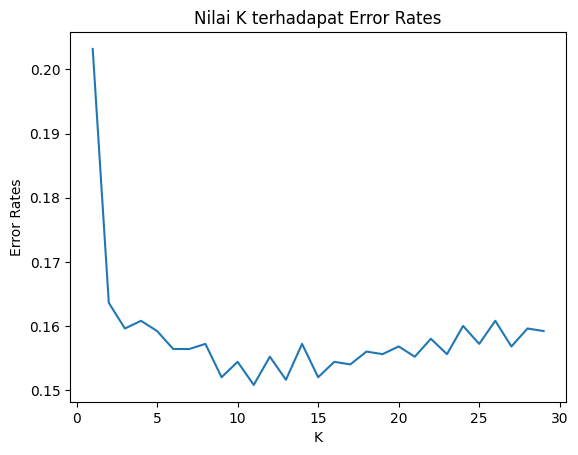

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,30),test_error_rates) #deklarasi grafik plot dengan x = nilai k bernilai 1-30 dan y=nilai test error rates
plt.ylabel('Error Rates') #print nama sumbu y
plt.xlabel('K') # print nama sumbu x
plt.title('Nilai K terhadapat Error Rates') #print judul grafik
plt.show() # menampilkan grafik

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11) #mengunakan nilai K yang didapat dari perhitungan Error Rates
knn_model.fit(scaled_X_train,y_train)
y_pred_test = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred_test)

0.8492

### Kesimpulan Pencarian Nilai K
- Dengan metode GridSearchCV lebih efektif untuk meningkatkan performa model KNN dengan hasil akurasi 0.85 yang dimana nilai tersebut lebih besar dari niai akurasi yang menggunakan Error Rates yang sebesar 0.849

## Model 3 - Random Forest
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators = 10,max_features='auto',random_state=42)
model3.fit(scaled_X_train,y_train)

y_pred = model3.predict(scaled_X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1983
           1       0.71      0.45      0.55       517

    accuracy                           0.85      2500
   macro avg       0.79      0.70      0.73      2500
weighted avg       0.84      0.85      0.84      2500


[[1890   93]
 [ 285  232]]

0.8488


### Randomized Search
 - metode hyperparameter tuning yang lebih efektif daripada GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


rf_model = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(100, 1000),  # Jumlah pohon dalam ensemble
    'max_depth': [None] + list(range(5, 20)),  # Maksimum kedalaman pohon
    'min_samples_split': [2, 5, 10], # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4]   # Jumlah minimum sampel di leaf node
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, cv=3, scoring='accuracy', n_iter=10)

random_search.fit(scaled_X_train, y_train)
random_search.best_params_

{'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 207}

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

best_model = random_search.best_estimator_
y_pred = best_model.predict(scaled_X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1983
           1       0.78      0.47      0.59       517

    accuracy                           0.86      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500


[[1914   69]
 [ 274  243]]

0.8628


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

Berdasarkan hasil pemodelan dari ketiga algoritma telah didapatkan hasil akurasi seperti berikut :
  - Hasil akurasi Logistic Regression = 0.8112
  - Hasil akurasi K-Nearsest Neighbors (KNN) = 0.85
  - Hasil akurasi Random Forest = 0.8628 (Hasil akurasi yang paling tinggi)

Menunjukkan bahwa nilai akurasi model Random Forest lebih tinggi dari yang lainnya dikarenakan Random Forest memiliki kemampuan untuk menangani relasi dan pola yang lebih baik dalam data dibandingkan dengan Logistic Regression dan KNN
